# Statistikkprosjekt

Vårt første modelleringsprosjekt er et prosjekt der du skal samle inn et datasett og gjøre statistisk analyse og regresjonsanalyse med disse dataene. Oppgaven går ut på følgende:

1. Samle inn data. Du bør måle minst 6 variabler og samle inn minst 25 målepunkter for hver av de fire variablene. Du kan bruke sensorer, spørreundersøkelser eller tilsvarende. Lagre dataene i en .txt-fil, .csv-fil eller .xlsx-fil (Excel). Hvis du finner et veldig godt datasett på internett som du heller ønsker å bruke, spør læreren om dere kan bruke det isteden.

2. Les dataene i Python og lag relevante visualiseringer som beskriver hva datasettet forteller oss.

3. Beregn relevante mål på sentraltendens og spredning. Presenter resultatene i en oversiktlig tabell. Forklar hva disse målene forteller om dataene dine. Lag gjerne visualiseringer som beskriver spredningen.

4. Regn ut korrelasjoner i datasettet og lag et korrelasjonsplott. Diskuter eventuelle korrelasjoner.

5. Gjør en lineær regresjon av to variabler der en lineær modell kan beskrive sammenhengen mellom variablene. Diskuter modellen.



Prosjektet leveres som fullstendig, sammensatt rapport (lever en .ipynb-fil og .pdf av notebooken). Husk å skrive navnet på alle i gruppa på rapporten. Alle på gruppa skal levere den samme fila på Teams.

## Resources
Data hentet fra Metrologist Institutt via frost APIen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Api

In [2]:
df = Api.getData(reftime="2013-04-01/2020-12-03")

Found dataframe.csv


In [3]:
df.head()

,Unnamed: 0,index,elementId,value,unit,level,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,referenceTime,sourceId
0,0,0,mean(air_temperature P1D),5.1,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1D,0,C,2,0.0,2021-04-01T00:00:00.000Z,SN18700:0
1,1,1,mean(air_temperature P1D),4.4,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT6H,P1D,0,C,2,2.0,2021-04-01T00:00:00.000Z,SN18700:0
2,2,2,sum(precipitation_amount P1D),0.0,mm,NaN,PT18H,P1D,0,C,2,2.0,2021-04-01T00:00:00.000Z,SN18700:0
3,3,3,sum(precipitation_amount P1D),0.0,mm,NaN,PT6H,P1D,0,C,2,0.0,2021-04-01T00:00:00.000Z,SN18700:0
4,4,4,mean(wind_speed P1D),2.1,m/s,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1D,0,C,2,2.0,2021-04-01T00:00:00.000Z,SN18700:0


In [4]:
import DataHandler

fixedDf = DataHandler.fixTable(df)

<AxesSubplot: xlabel='referenceTime', ylabel='mean(air_temperature P1D)'>

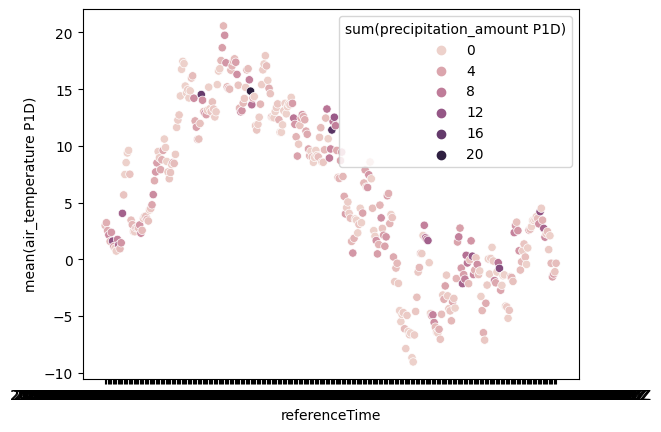

In [13]:
fixedDf.head()
sns.scatterplot(x='referenceTime', y='mean(air_temperature P1D)', data=fixedDf, hue='sum(precipitation_amount P1D)')